**Student Mobility and Gender Analysis Dashboard**

Objective: Analyze how students move across countries, their gender distribution, and preferred education levels.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [91]:
clean_gender = pd.read_csv("clean_gender.csv")
cleaned_origin = pd.read_csv("cleaned_origin.csv")
cleaned_fields = pd.read_csv("cleaned_fields.csv")
cleaned_programmes = pd.read_csv("cleaned_programmes.csv")


In [92]:
clean_gender.head()

,country,short_cycle_total,short_cycle_men,short_cycle_women,bachelor_total,bachelor_men,bachelor_women,master_total,master_men,master_women,doctoral_total,doctoral_men,doctoral_women,bachelor_check
0,EU,38612.0,16317.0,22294.0,772875,377851,395024,786432,383548,402884,158749.0,84124.0,74625.0,0
1,Belgium,1316.0,353.0,963.0,29598,11457,18141,21286,9332,11954,5081.0,2763.0,2318.0,0
2,Bulgaria,0.0,0.0,0.0,5667,3280,2387,12789,6040,6749,794.0,432.0,362.0,0
3,Czechia,69.0,19.0,50.0,29800,14504,15296,20772,9370,11402,5635.0,3063.0,2572.0,0
4,Denmark,2341.0,1059.0,1282.0,9713,4193,5520,13920,6385,7535,3700.0,1954.0,1746.0,0


In [93]:
clean_gender.shape

(36, 14)

In [94]:
cleaned_origin.head()


,country,origin_1,origin_1_share,origin_2,origin_2_share,origin_3,origin_3_share
0,EU (¹),China (including Hong Kong),5.610099,Ukraine,5.095233,India,5.004571
1,Belgium,France,33.351373,Netherlands,7.267680,Cameroon,5.914701
2,Bulgaria,Greece,20.877922,United Kingdom,14.400000,Germany,9.418182
3,Czechia,Slovakia,38.206340,Russia,13.826498,Ukraine,11.601749
4,Denmark,Germany,10.945609,Norway,9.503269,China (including Hong Kong),5.543573


In [95]:
cleaned_origin.shape

(36, 7)

In [96]:
cleaned_fields.head()

,country,generic programmes and qualifications,education,arts and humanities,social sciences journalism and information,business administration and law,natural sciences mathematics and statistics,information and communication technologies,engineering manufacturing and construction,agriculture forestry fisheries and veterinary,health and welfare,services,unknown
0,EU,0.007560,2.043271,11.772670,10.239351,21.891684,9.070759,7.837715,18.062890,1.859300,13.926576,2.394642,0.893581
1,Belgium,0.000000,2.880536,11.845114,11.562298,14.682006,5.586495,3.362371,11.286465,4.476179,32.743842,1.543269,0.031424
2,Bulgaria,0.000000,2.872727,5.485714,5.516883,8.592208,1.033766,4.067532,5.683117,3.397403,58.036364,4.109091,1.205195
3,Czechia,0.001777,1.899566,10.242377,10.317009,21.112019,9.346791,13.446229,10.256593,3.095458,17.000142,3.282039,0.000000
4,Denmark,0.000000,1.863584,9.034845,9.961583,23.003303,9.476309,8.182247,24.941026,1.486149,9.567298,2.449956,0.033700


In [97]:
cleaned_fields.shape

(36, 13)

In [98]:
cleaned_programmes.head()

,country,eu_programmes,other_international_programmes,other_programmes,funding_sum_check
0,EU,64.823898,12.886690,22.289412,100.0
1,Unknown,NaN,NaN,NaN,NaN
2,Cyprus,100.000000,0.000000,0.000000,100.0
3,Hungary,98.450813,1.394268,0.154919,100.0
4,Slovakia,98.297214,0.928793,0.773994,100.0


In [99]:
cleaned_programmes.shape

(35, 5)

In [100]:
clean_gender.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            36 non-null     object 
 1   short_cycle_total  36 non-null     float64
 2   short_cycle_men    36 non-null     float64
 3   short_cycle_women  36 non-null     float64
 4   bachelor_total     36 non-null     int64  
 5   bachelor_men       36 non-null     int64  
 6   bachelor_women     36 non-null     int64  
 7   master_total       36 non-null     int64  
 8   master_men         36 non-null     int64  
 9   master_women       36 non-null     int64  
 10  doctoral_total     35 non-null     float64
 11  doctoral_men       35 non-null     float64
 12  doctoral_women     35 non-null     float64
 13  bachelor_check     36 non-null     int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.1+ KB


In [101]:
cleaned_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         36 non-null     object 
 1   origin_1        36 non-null     object 
 2   origin_1_share  35 non-null     float64
 3   origin_2        36 non-null     object 
 4   origin_2_share  35 non-null     float64
 5   origin_3        36 non-null     object 
 6   origin_3_share  35 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.1+ KB


In [102]:
cleaned_fields.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   country                                        36 non-null     object 
 1   generic programmes and qualifications          36 non-null     float64
 2   education                                      36 non-null     float64
 3   arts and humanities                            36 non-null     float64
 4   social sciences journalism and information     36 non-null     float64
 5   business administration and law                36 non-null     float64
 6   natural sciences mathematics and statistics    36 non-null     float64
 7   information and communication technologies     36 non-null     float64
 8   engineering manufacturing and construction     36 non-null     float64
 9   agriculture forestry fisheries and veterinary  36 non-nu

In [103]:
cleaned_programmes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         35 non-null     object 
 1   eu_programmes                   32 non-null     float64
 2   other_international_programmes  32 non-null     float64
 3   other_programmes                32 non-null     float64
 4   funding_sum_check               32 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


In [104]:
clean_gender.isna().sum()


country              0
short_cycle_total    0
short_cycle_men      0
short_cycle_women    0
bachelor_total       0
bachelor_men         0
bachelor_women       0
master_total         0
master_men           0
master_women         0
doctoral_total       1
doctoral_men         1
doctoral_women       1
bachelor_check       0
dtype: int64

In [105]:
cleaned_origin.isna().sum()


country           0
origin_1          0
origin_1_share    1
origin_2          0
origin_2_share    1
origin_3          0
origin_3_share    1
dtype: int64

In [106]:
cleaned_programmes.isna().sum()


country                           0
eu_programmes                     3
other_international_programmes    3
other_programmes                  3
funding_sum_check                 3
dtype: int64

In [107]:
cleaned_fields.isna().sum()

country                                          0
generic programmes and qualifications            0
education                                        0
arts and humanities                              0
social sciences journalism and information       0
business administration and law                  0
natural sciences mathematics and statistics      0
information and communication technologies       0
engineering manufacturing and construction       0
agriculture forestry fisheries and veterinary    0
health and welfare                               0
services                                         0
unknown                                          0
dtype: int64

### Total Students by Education Level
I am calculating the sum of students in:
- Short Cycle
- Bachelor
- Master
- Doctoral

This gives an overview of the most popular education levels in 2023.



In [108]:
## Creating total_students column (sum across all levels) also handled missing data 
clean_gender["total_students"] = (
    clean_gender["short_cycle_total"] +
    clean_gender["bachelor_total"] +
    clean_gender["master_total"] +
    clean_gender["doctoral_total"].fillna(0) 
)

## Top 5 countries (excluding EU)
top_5 = (
    clean_gender[clean_gender["country"] != "EU"]
    .sort_values(by="total_students", ascending=False)
    .head(5)
    [["country", "total_students"]]
    .reset_index(drop=True)  # reseting index for clean output
)


## Bottom 5 countries (excluding EU)
bottom_5 = (
    clean_gender[clean_gender["country"] != "EU"]
    .sort_values(by="total_students", ascending=True)
    .head(5)
    [["country", "total_students"]]
    .reset_index(drop=True)
)

# EU overall
eu_total = clean_gender.loc[clean_gender["country"] == "EU", ["country", "total_students"]]


print("Top 5 Countries by Total Students:")
display(top_5)

print("\n Bottom 5 Countries by Total Students:")
display(bottom_5)

print("\n EU Overall Total Students:")
display(eu_total)

Top 5 Countries by Total Students:


,country,total_students
0,Germany,423197.0
1,Türkiye,301218.0
2,France,276216.0
3,Netherlands,169459.0
4,Italy,106450.0



 Bottom 5 Countries by Total Students:


,country,total_students
0,Liechtenstein (¹),831.0
1,Albania,2012.0
2,Iceland,2089.0
3,Luxembourg,4170.0
4,Estonia,4870.0



 EU Overall Total Students:


,country,total_students
0,EU,1756668.0


In [109]:
# Total male and female students (sum across all levels)
clean_gender["total_men"] = (
    clean_gender["short_cycle_men"] +
    clean_gender["bachelor_men"] +
    clean_gender["master_men"] +
    clean_gender["doctoral_men"].fillna(0)  # handled missing doctoral data
)

clean_gender["total_women"] = (
    clean_gender["short_cycle_women"] +
    clean_gender["bachelor_women"] +
    clean_gender["master_women"] +
    clean_gender["doctoral_women"].fillna(0)
)

# total students
clean_gender["total_students_check"] = clean_gender["total_men"] + clean_gender["total_women"]
clean_gender[["country", "total_men", "total_women", "total_students_check"]].head()


,country,total_men,total_women,total_students_check
0,EU,861840.0,894827.0,1756667.0
1,Belgium,23905.0,33376.0,57281.0
2,Bulgaria,9752.0,9498.0,19250.0
3,Czechia,26956.0,29320.0,56276.0
4,Denmark,13591.0,16083.0,29674.0


In [110]:
# Calculating female percentage
clean_gender["female_percentage"] = (clean_gender["total_women"] / clean_gender["total_students_check"]) * 100

# Top 5 countries with highest female participation
top_female_countries = clean_gender.sort_values(by="female_percentage", ascending=False).head(5)

top_female_countries[["country", "total_students_check", "total_women", "female_percentage"]].reset_index(drop=True)


,country,total_students_check,total_women,female_percentage
0,Iceland,2089.0,1354.0,64.815701
1,Belgium,57281.0,33376.0,58.267139
2,Slovenia,8499.0,4845.0,57.006707
3,Netherlands,169459.0,94902.0,56.002927
4,Croatia,5929.0,3283.0,55.371901


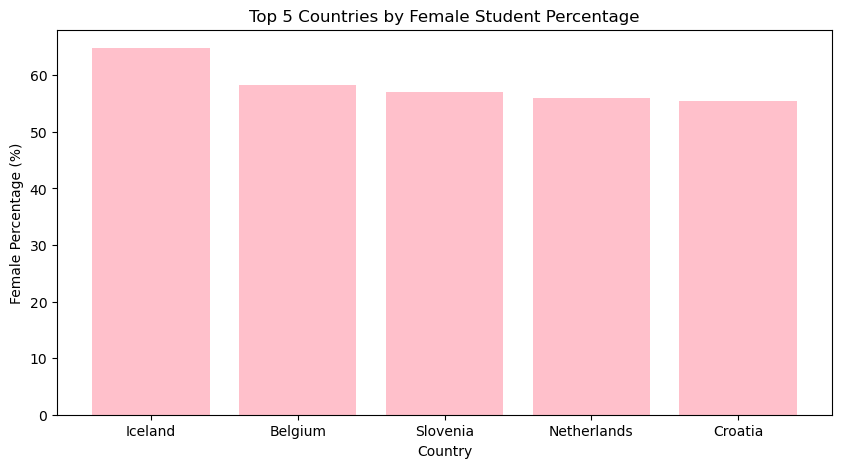

In [111]:
import matplotlib.pyplot as plt

# Bar chart of top 5 countries with highest female participation
plt.figure(figsize=(10,5))
plt.bar(top_female_countries["country"], top_female_countries["female_percentage"], color='pink')
plt.title("Top 5 Countries by Female Student Percentage")
plt.ylabel("Female Percentage (%)")
plt.xlabel("Country")
plt.show()


In [112]:
""" Calculate total male and female students per country
clean_gender["total_men"] = (
    clean_gender["short_cycle_men"] +
    clean_gender["bachelor_men"] +
    clean_gender["master_men"] +
    clean_gender["doctoral_men"].fillna(0)  # handle missing doctoral data
)

clean_gender["total_women"] = (
    clean_gender["short_cycle_women"] +
    clean_gender["bachelor_women"] +
    clean_gender["master_women"] +
    clean_gender["doctoral_women"].fillna(0)
)

## Total students check
clean_gender["total_students_check"] = clean_gender["total_men"] + clean_gender["total_women"]

## Female percentage
clean_gender["female_percentage"] = (clean_gender["total_women"] / clean_gender["total_students_check"]) * 100

## Sort by female percentage descending
gender_distribution = clean_gender.sort_values(by="female_percentage", ascending=False)

## Display all countries with structured columns
gender_distribution[["country", "total_students_check", "total_men", "total_women", "female_percentage"]].reset_index(drop=True)"""


' Calculate total male and female students per country\nclean_gender["total_men"] = (\n    clean_gender["short_cycle_men"] +\n    clean_gender["bachelor_men"] +\n    clean_gender["master_men"] +\n    clean_gender["doctoral_men"].fillna(0)  # handle missing doctoral data\n)\n\nclean_gender["total_women"] = (\n    clean_gender["short_cycle_women"] +\n    clean_gender["bachelor_women"] +\n    clean_gender["master_women"] +\n    clean_gender["doctoral_women"].fillna(0)\n)\n\n## Total students check\nclean_gender["total_students_check"] = clean_gender["total_men"] + clean_gender["total_women"]\n\n## Female percentage\nclean_gender["female_percentage"] = (clean_gender["total_women"] / clean_gender["total_students_check"]) * 100\n\n## Sort by female percentage descending\ngender_distribution = clean_gender.sort_values(by="female_percentage", ascending=False)\n\n## Display all countries with structured columns\ngender_distribution[["country", "total_students_check", "total_men", "total_women",

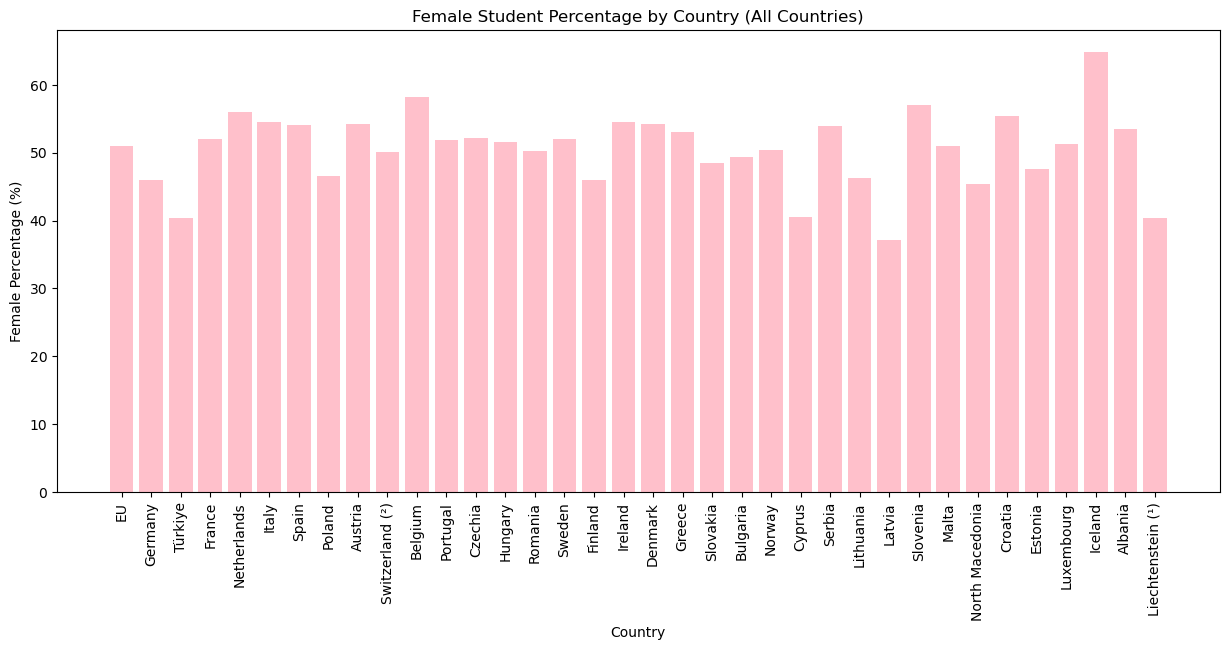

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(gender_distribution["country"], gender_distribution["female_percentage"], color='pink')
plt.xticks(rotation=90)
plt.title("Female Student Percentage by Country (All Countries)")
plt.ylabel("Female Percentage (%)")
plt.xlabel("Country")
plt.show()


In [114]:

"""
gender_distribution = clean_gender.sort_values(by="total_students_check", ascending=False)
## Creating stacked bar chart
plt.figure(figsize=(15,7))

# Ploting male students
plt.bar(
    gender_distribution["country"], 
    gender_distribution["total_men"], 
    label="Male", color="skyblue"
)

# Ploting female students on top
plt.bar(
    gender_distribution["country"], 
    gender_distribution["total_women"], 
    bottom=gender_distribution["total_men"], 
    label="Female", color="pink"
)

plt.xticks(rotation=90)
plt.ylabel("Number of Students")
plt.xlabel("Country")
plt.title("Male vs Female Student Composition by Country (All Countries)")
plt.legend()
plt.tight_layout()
plt.show()
"""

'\ngender_distribution = clean_gender.sort_values(by="total_students_check", ascending=False)\n## Creating stacked bar chart\nplt.figure(figsize=(15,7))\n\n# Ploting male students\nplt.bar(\n    gender_distribution["country"], \n    gender_distribution["total_men"], \n    label="Male", color="skyblue"\n)\n\n# Ploting female students on top\nplt.bar(\n    gender_distribution["country"], \n    gender_distribution["total_women"], \n    bottom=gender_distribution["total_men"], \n    label="Female", color="pink"\n)\n\nplt.xticks(rotation=90)\nplt.ylabel("Number of Students")\nplt.xlabel("Country")\nplt.title("Male vs Female Student Composition by Country (All Countries)")\nplt.legend()\nplt.tight_layout()\nplt.show()\n'

**Field of Study Analysis**

- Sum students in each field across all countries

- Rank fields from most to least popular

- highlighting tech vs non-tech field

In [115]:
# Select all numeric field columns (exclude 'country')
fields_columns = cleaned_fields.columns[1:]  # skip 'country'

# Sum students per field across all countries
field_totals = cleaned_fields[fields_columns].sum().sort_values(ascending=False)

# Convert to structured DataFrame for clean display
field_totals_df = field_totals.reset_index()
field_totals_df.columns = ["Field", "Total_Students"]

field_totals_df


,Field,Total_Students
0,business administration and law,804.141083
1,health and welfare,698.139590
2,engineering manufacturing and construction,523.133171
3,arts and humanities,379.683930
4,social sciences journalism and information,370.977566
5,information and communication technologies,252.495219
6,natural sciences mathematics and statistics,251.048809
7,services,107.135277
8,education,100.513469
9,agriculture forestry fisheries and veterinary,76.281398


In [116]:
top_5_fields = field_totals_df.head(5)
top_5_fields


,Field,Total_Students
0,business administration and law,804.141083
1,health and welfare,698.139590
2,engineering manufacturing and construction,523.133171
3,arts and humanities,379.683930
4,social sciences journalism and information,370.977566


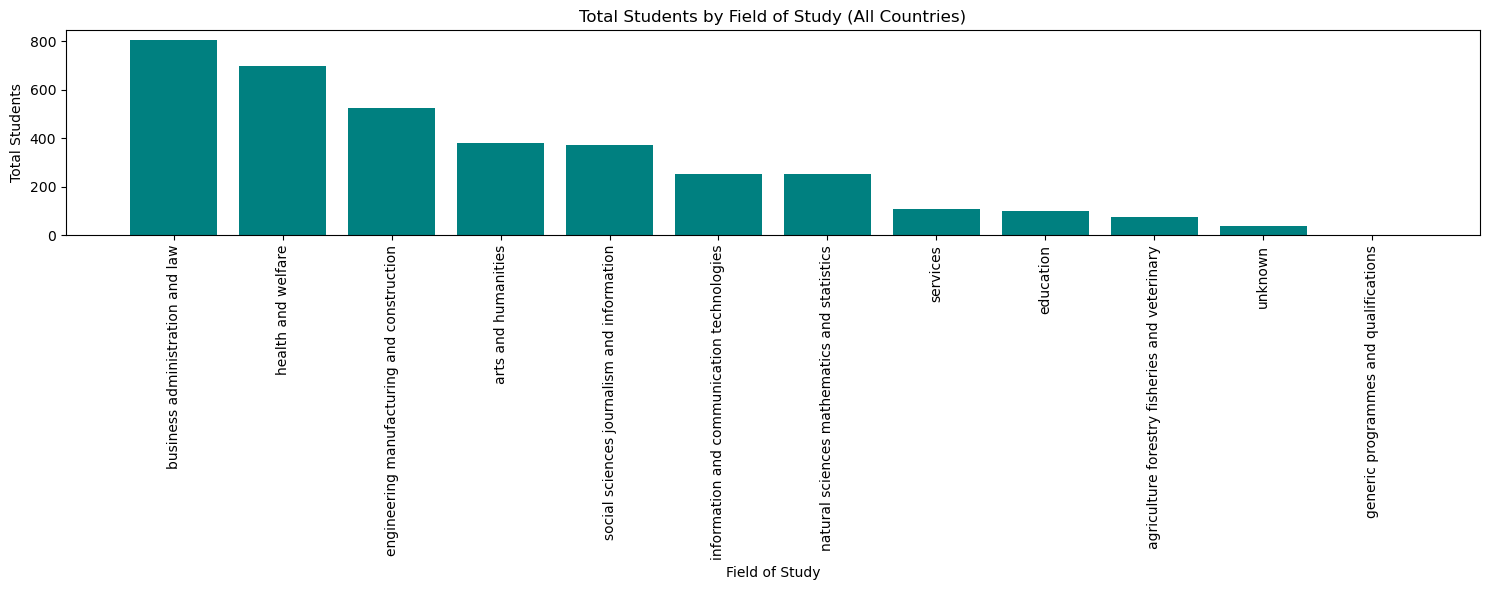

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(field_totals_df["Field"], field_totals_df["Total_Students"], color="teal")
plt.xticks(rotation=90)
plt.ylabel("Total Students")
plt.xlabel("Field of Study")
plt.title("Total Students by Field of Study (All Countries)")
plt.tight_layout()
plt.show()


**Business administration, health and welfare, and engineering attract the largest number of students, while generic programmes and unknown programs are the least popular.**

**Tech vs Non-Tech Field Analysis**

- Sum total students in Tech fields (Engineering + ICT)

- Sum total students in Non-Tech fields (all others)

- Comparing with a bar chart or pie chart

In [118]:
# Defining fields
tech_fields = ["engineering manufacturing and construction", "information and communication technologies"]
non_tech_fields = [col for col in cleaned_fields.columns[1:] if col not in tech_fields]

#  Calculate total students
tech_total = cleaned_fields[tech_fields].sum().sum()
non_tech_total = cleaned_fields[non_tech_fields].sum().sum()

# Creating structured DataFrame for display
tech_comparison = pd.DataFrame({
    "Category": ["Tech", "Non-Tech"],
    "Total_Students": [tech_total, non_tech_total]
})

tech_comparison


,Category,Total_Students
0,Tech,775.628391
1,Non-Tech,2824.441978


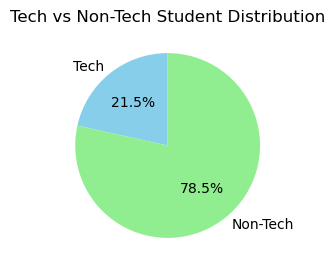

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.pie(
    tech_comparison["Total_Students"], 
    labels=tech_comparison["Category"], 
    autopct="%1.1f%%", 
    colors=["skyblue", "lightgreen"], 
    startangle=90
)
plt.title("Tech vs Non-Tech Student Distribution")
plt.show()


**Engineering and ICT together attract 21.5% of students, while non-tech fields account for 78.5%. This indicates a strong trend toward non-technology focused education.**

**International Origin Analysis**

- Finding the average share of students from each origin (origin_1, origin_2, origin_3)

- Ranking countries by total contribution


In [127]:
# Calculating average origin share for each origin column
origin_1_avg = cleaned_origin.groupby("origin_1")["origin_1_share"].mean().sort_values(ascending=False)
origin_2_avg = cleaned_origin.groupby("origin_2")["origin_2_share"].mean().sort_values(ascending=False)
origin_3_avg = cleaned_origin.groupby("origin_3")["origin_3_share"].mean().sort_values(ascending=False)

# Converting to DataFrames for structured display
origin_1_avg_df = origin_1_avg.reset_index().rename(columns={"origin_1": "Country", "origin_1_share": "Average of Origin1 Share"})
origin_2_avg_df = origin_2_avg.reset_index().rename(columns={"origin_2": "Country", "origin_2_share": "Average of Origin2 Share"})
origin_3_avg_df = origin_3_avg.reset_index().rename(columns={"origin_3": "Country", "origin_3_share": "Average of Origin3 Share"})

#  top 5 for Origin 1 (most important)
origin_1_avg_df.head(5)


,Country,Average of Origin1 Share
0,Cyprus,57.518897
1,Türkiye,54.775008
2,Bosnia and Herzegovina,50.271709
3,Slovakia,38.206340
4,Austria,38.146811


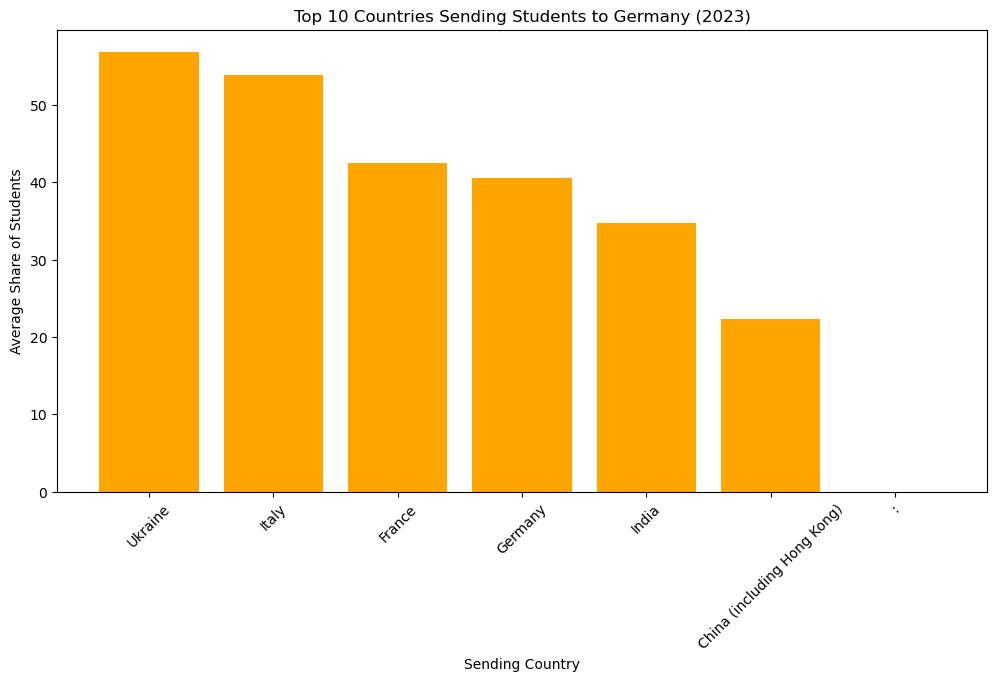

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(origin_totals_df["Country"].head(10), origin_totals_df["Total_Average_Share"].head(10), color="orange")
plt.xticks(rotation=45)
plt.ylabel("Average Share of Students")
plt.xlabel("Sending Country")
plt.title("Top 10 Countries Sending Students to Germany (2023)")
plt.show()


**Country Ukraine contribute the largest share of students to Germany. Recruitment efforts can be focused accordingly.**

**Programme & Funding Analysis**

- Finding total students per programme type (eu_programmes, other_international_programmes, other_programmes)

- Identifying countries with missing programme data

- Comparing EU vs non-EU program participation


In [129]:
# Filling missing values with 0 (because we are summing students per programme)
cleaned_programmes_filled = cleaned_programmes.fillna(0)


In [130]:
programme_totals = {
    "EU Programmes": cleaned_programmes_filled["eu_programmes"].sum(),
    "Other International Programmes": cleaned_programmes_filled["other_international_programmes"].sum(),
    "Other Programmes": cleaned_programmes_filled["other_programmes"].sum()
}

programme_totals


{'EU Programmes': np.float64(2414.168316437325),
 'Other International Programmes': np.float64(416.2862863660797),
 'Other Programmes': np.float64(369.54539719659545)}

In [132]:
# Sum per country (already filled missing with 0)
cleaned_programmes_filled["total_programmes"] = (
    cleaned_programmes_filled["eu_programmes"] +
    cleaned_programmes_filled["other_international_programmes"] +
    cleaned_programmes_filled["other_programmes"]
)

# Sort descending to see top countries by total programmes
country_programmes = cleaned_programmes_filled.sort_values(by="total_programmes", ascending=False)
country_programmes[["country", "eu_programmes", "other_international_programmes", "other_programmes", "total_programmes"]]
country_programmes.head(5)


,country,eu_programmes,other_international_programmes,other_programmes,funding_sum_check,total_programmes
4,Slovakia,98.297214,0.928793,0.773994,100.0,100.0
9,Portugal,95.383166,3.894472,0.722362,100.0,100.0
13,Greece,90.525114,9.474886,0.000000,100.0,100.0
28,Denmark,38.239378,51.457928,10.302694,100.0,100.0
30,Norway,49.007315,42.946708,8.045977,100.0,100.0


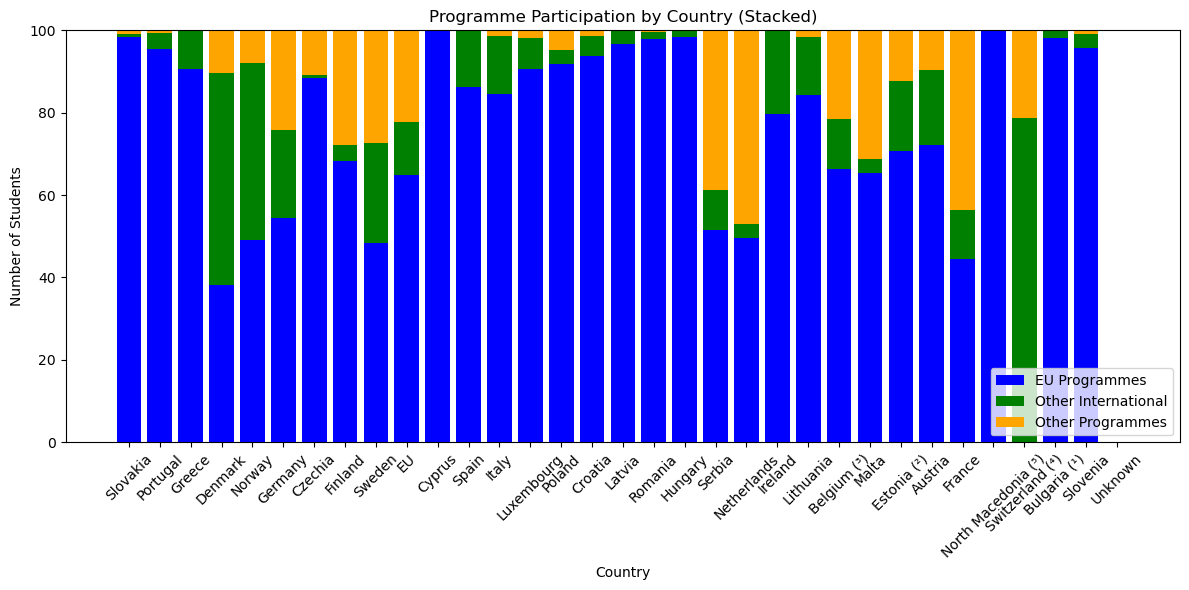

In [134]:

plt.figure(figsize=(12,6))
plt.bar(country_programmes["country"], country_programmes["eu_programmes"], label="EU Programmes", color="blue")
plt.bar(country_programmes["country"], country_programmes["other_international_programmes"], bottom=country_programmes["eu_programmes"], label="Other International", color="green")
plt.bar(country_programmes["country"], country_programmes["other_programmes"], bottom=country_programmes["eu_programmes"]+country_programmes["other_international_programmes"], label="Other Programmes", color="orange")

plt.xticks(rotation=45)
plt.ylabel("Number of Students")
plt.xlabel("Country")
plt.title("Programme Participation by Country (Stacked)")
plt.legend()
plt.tight_layout()
plt.show()


**Most students participate in EU programmes, followed by other international programs. Country X shows the highest total programme participation, indicating strong international mobility.**